In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import plotly.graph_objects as go

In [2]:
history = pd.read_json(r'C:\Users\Dhruv Kumar Jha\Downloads\Spotify_Analysis\my_spotify_data\MyData\StreamingHistory0.json')
history

,endTime,artistName,trackName,msPlayed
0,2020-02-19 21:21,Sachet Tandon,"Bekhayali (From ""Kabir Singh"")",6660
1,2020-02-20 05:50,Sachet Tandon,"Bekhayali (From ""Kabir Singh"")",22870
2,2020-02-20 05:54,Billie Eilish,No Time To Die,242265
3,2020-02-20 05:59,Neha Kakkar,Yaad Piya Ki Aane Lagi,256678
4,2020-02-20 06:02,Guru Randhawa,Lagdi Lahore Di,215368
...,...,...,...,...
9383,2021-02-20 21:40,Vishal Mishra,Kaise Hua,57533
9384,2021-02-20 21:45,Arijit Singh,Yeh Fitoor Mera,283070
9385,2021-02-20 21:48,Sachin-Jigar,Saibo,195253
9386,2021-02-20 21:54,Pritam,Jiyein Kyun,264962


In [3]:
#converting msPlayed to minutes_played

history['minutes_played'] = history.msPlayed.divide(60000)
history.drop('msPlayed', axis=1, inplace=True)
history

,endTime,artistName,trackName,minutes_played
0,2020-02-19 21:21,Sachet Tandon,"Bekhayali (From ""Kabir Singh"")",0.111000
1,2020-02-20 05:50,Sachet Tandon,"Bekhayali (From ""Kabir Singh"")",0.381167
2,2020-02-20 05:54,Billie Eilish,No Time To Die,4.037750
3,2020-02-20 05:59,Neha Kakkar,Yaad Piya Ki Aane Lagi,4.277967
4,2020-02-20 06:02,Guru Randhawa,Lagdi Lahore Di,3.589467
...,...,...,...,...
9383,2021-02-20 21:40,Vishal Mishra,Kaise Hua,0.958883
9384,2021-02-20 21:45,Arijit Singh,Yeh Fitoor Mera,4.717833
9385,2021-02-20 21:48,Sachin-Jigar,Saibo,3.254217
9386,2021-02-20 21:54,Pritam,Jiyein Kyun,4.416033


### Popularity of artist based on the number of times their songs were played


In [4]:
most_played_artists_by_count = history.groupby(by='artistName')['trackName'].count().sort_values(ascending=False)[:16]
print('The most popular artists by number of times their songs were played were:\n\n{}'.format(most_played_artists_by_count))

The most popular artists by number of times their songs were played were:

artistName
Arijit Singh          244
Pritam                238
Keethan               207
Morillo               207
Aeden                 136
Cartoon               127
KSHMR                 125
Saib                  110
Marshmello            110
Unknown Brain         107
Armaan Malik          105
Kina                  105
HVME                  103
Shankar-Ehsaan-Loy    102
Serena                100
Ritviz                100
Name: trackName, dtype: int64


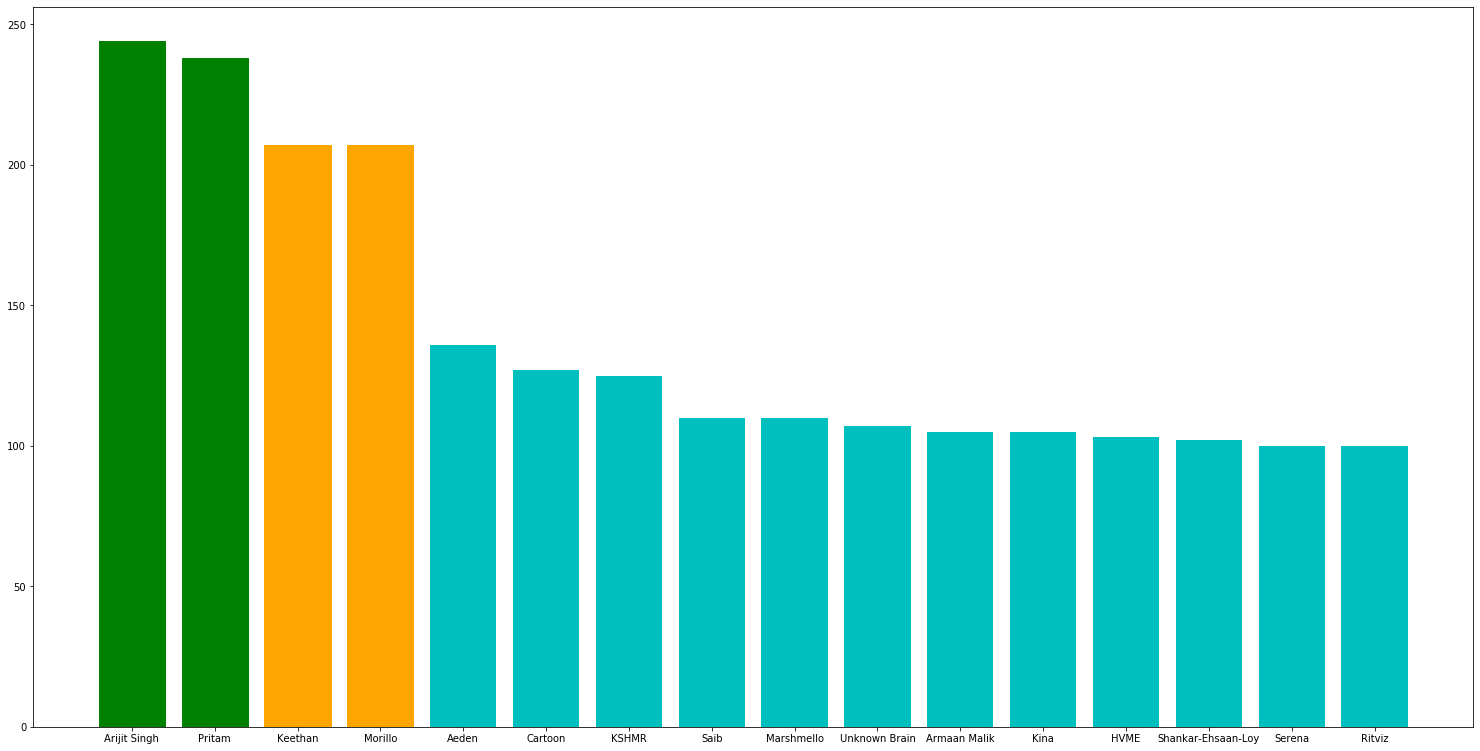

In [5]:
# Visualize the most popular artists with a standard bar chart

fig = plt.figure(figsize=(20,10))
ax = fig.add_axes([0,0,1,1])
barlist = ax.bar(most_played_artists_by_count.index, most_played_artists_by_count, color='c')
barlist[0].set_color('g')
barlist[1].set_color('g')
barlist[2].set_color('orange')
barlist[3].set_color('orange')
plt.show()

### Popularity of artist based on the total amount of minutes spent on their songs


In [6]:
amount_of_time = history.groupby(by='artistName')['minutes_played'].sum().sort_values(ascending=False)[:10]
print('The most popular artists by amount of time spent listening to their songs were:\n\n{}'.format(amount_of_time))

The most popular artists by amount of time spent listening to their songs were:

artistName
Arijit Singh     901.478750
Pritam           843.587500
Morillo          649.909950
Keethan          565.719433
Mohit Chauhan    397.222650
KSHMR            395.734400
Saib             359.760483
Cartoon          359.522367
Aeden            337.461483
Marshmello       304.786833
Name: minutes_played, dtype: float64


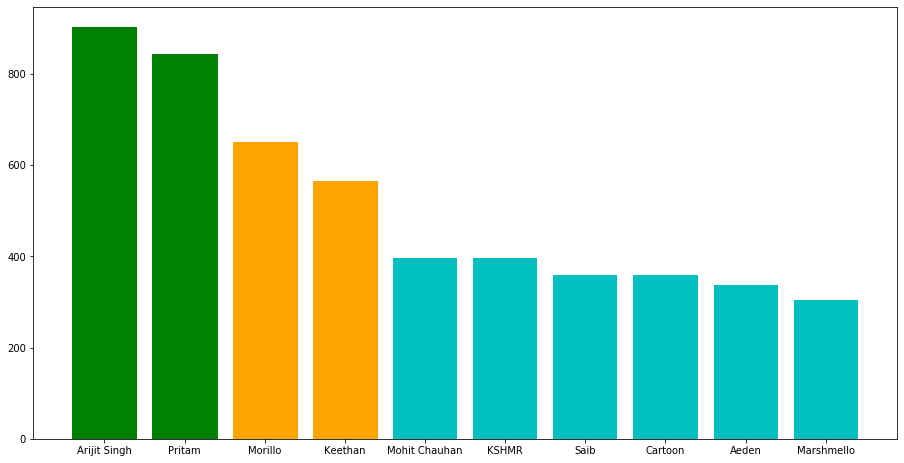

In [7]:
# Visualize the most popular artists with a standard bar chart

fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0,0,1,1])
barlist = ax.bar(amount_of_time.index, amount_of_time, color='c')
barlist[0].set_color('g')
barlist[1].set_color('g')
barlist[2].set_color('orange')
barlist[3].set_color('orange')
plt.show()

### Total amount of time spent listening to music each day


In [8]:
#converting end_time to timestamp format

history['endTime'] = pd.to_datetime(history['endTime'])
history['date'] = [d.date() for d in history['endTime']]
history['time'] = [d.time() for d in history['endTime']]
history.drop('endTime', axis=1, inplace=True)
history.head()

,artistName,trackName,minutes_played,date,time
0,Sachet Tandon,"Bekhayali (From ""Kabir Singh"")",0.111000,2020-02-19,21:21:00
1,Sachet Tandon,"Bekhayali (From ""Kabir Singh"")",0.381167,2020-02-20,05:50:00
2,Billie Eilish,No Time To Die,4.037750,2020-02-20,05:54:00
3,Neha Kakkar,Yaad Piya Ki Aane Lagi,4.277967,2020-02-20,05:59:00
4,Guru Randhawa,Lagdi Lahore Di,3.589467,2020-02-20,06:02:00


In [9]:
day = history.groupby(by=['date'], as_index=False).sum()
day.head()

,date,minutes_played
0,2020-02-19,0.111000
1,2020-02-20,25.187517
2,2020-03-03,0.831167
3,2020-03-04,22.233817
4,2020-03-06,45.988867


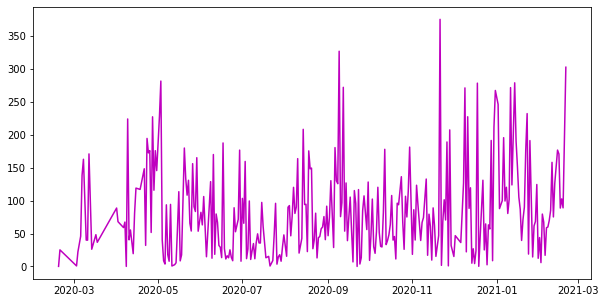

In [10]:
fig = plt.figure(figsize=(10,5))
plt.plot(day.date, day.minutes_played, color='m') 
plt.show()

### Day wise time spent

In [11]:
date = history
date['day'] = pd.DatetimeIndex(date['date']).day_name()
date.head()

,artistName,trackName,minutes_played,date,time,day
0,Sachet Tandon,"Bekhayali (From ""Kabir Singh"")",0.111000,2020-02-19,21:21:00,Wednesday
1,Sachet Tandon,"Bekhayali (From ""Kabir Singh"")",0.381167,2020-02-20,05:50:00,Thursday
2,Billie Eilish,No Time To Die,4.037750,2020-02-20,05:54:00,Thursday
3,Neha Kakkar,Yaad Piya Ki Aane Lagi,4.277967,2020-02-20,05:59:00,Thursday
4,Guru Randhawa,Lagdi Lahore Di,3.589467,2020-02-20,06:02:00,Thursday


In [12]:
date = date.groupby(by=['day'], as_index=True).sum()
date

,minutes_played
day,
Friday,3645.839350
Monday,3480.715333
Saturday,4476.903683
Sunday,2765.871383
Thursday,3878.220483
Tuesday,2701.630917
Wednesday,4314.558350


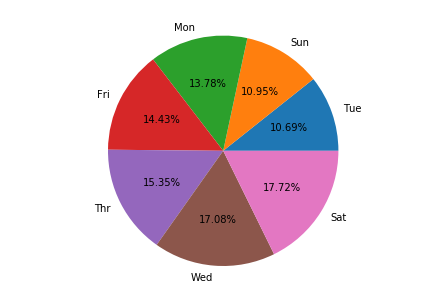

In [13]:
# Visualize days using pie chart

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
week = ['Tue','Sun','Mon','Fri','Thr','Wed','Sat']
ax.pie(date.minutes_played.sort_values(), labels = week, autopct='%1.2f%%')
plt.show()

### Most listened to songs

In [14]:
song = history
song = song.groupby(['trackName'], as_index=False).sum()
song = song.sort_values(by='minutes_played', ascending=False)
song

,trackName,minutes_played
882,Makers Anthem,648.177950
715,Ki Honda Pyaar (Arijit Singh Version),412.799517
176,Bombay Dreams (feat. Kavita Seth),392.667583
1592,Yu Garden,359.760483
23,"Aabaad Barbaad (From ""Ludo"")",346.370150
...,...,...
1281,Stockholm Syndrome,0.000000
988,Night Changes,0.000000
817,Little Things,0.000000
1249,Slow Hands,0.000000


In [15]:
song_artist = history
song_artist = song_artist.sort_values(by='trackName', ascending=False)
song_artist.drop('time', axis=1, inplace=True)
song_artist.drop('date', axis=1, inplace=True)
song_artist.drop('minutes_played', axis=1, inplace=True)
song_artist.head(15)

,artistName,trackName,day
8754,LiSA,紅蓮華,Thursday
1461,Ikimonogakari,ブルーバード,Sunday
1702,KANA-BOON,シルエット,Wednesday
1717,Jeremy Zucker,you were good to me (bonus track),Wednesday
9308,Tate McRae,you broke me first,Saturday
3136,Taylor Swift,the last great american dynasty,Monday
7253,Nightmare,the WORLD,Wednesday
7257,Nightmare,the WORLD,Wednesday
9286,Zaeden,tere bina,Thursday
3977,Zaeden,tere bina,Wednesday


In [16]:
song_artist = song_artist.drop_duplicates(subset = ["trackName"])
song_artist

,artistName,trackName,day
8754,LiSA,紅蓮華,Thursday
1461,Ikimonogakari,ブルーバード,Sunday
1702,KANA-BOON,シルエット,Wednesday
1717,Jeremy Zucker,you were good to me (bonus track),Wednesday
9308,Tate McRae,you broke me first,Saturday
...,...,...,...
5163,Miscellaneous News,1992 Indian Stock Market Scam Analysis,Friday
1085,One Direction,18,Monday
3416,Bilal Saeed,12 Saal,Friday
1697,Eminem,'Till I Collapse,Wednesday


In [17]:
song = pd.merge(song_artist, song, on='trackName')
song = song.sort_values(by='minutes_played', ascending=False)
song

,artistName,trackName,day,minutes_played
753,Morillo,Makers Anthem,Saturday,648.177950
920,Arijit Singh,Ki Honda Pyaar (Arijit Singh Version),Friday,412.799517
1459,KSHMR,Bombay Dreams (feat. Kavita Seth),Saturday,392.667583
43,Saib,Yu Garden,Sunday,359.760483
1612,Pritam,"Aabaad Barbaad (From ""Ludo"")",Saturday,346.370150
...,...,...,...,...
1038,One Direction,If I Could Fly,Tuesday,0.000000
1098,One Direction,Hey Angel,Tuesday,0.000000
1132,One Direction,Happily,Tuesday,0.000000
1264,Sohail Sen,"Ek Chumma (From ""Housefull 4"")",Saturday,0.000000


In [18]:
song = song.sort_values(by='minutes_played', ascending=False).head(16)
song.reset_index(inplace = True, drop = True) 
song

,artistName,trackName,day,minutes_played
0,Morillo,Makers Anthem,Saturday,648.177950
1,Arijit Singh,Ki Honda Pyaar (Arijit Singh Version),Friday,412.799517
2,KSHMR,Bombay Dreams (feat. Kavita Seth),Saturday,392.667583
3,Saib,Yu Garden,Sunday,359.760483
4,Pritam,"Aabaad Barbaad (From ""Ludo"")",Saturday,346.370150
5,Aeden,I Feel Crazy,Monday,328.268867
6,The 1975,Tonight (I Wish I Was Your Boy),Thursday,299.332617
7,Kina,Can We Kiss Forever?,Friday,281.679383
8,HVME,Goosebumps,Tuesday,268.223183
9,Cartoon,Howling,Wednesday,266.392383


# Top 50 Songs

In [19]:
top_50 = history
top_50

,artistName,trackName,minutes_played,date,time,day
0,Sachet Tandon,"Bekhayali (From ""Kabir Singh"")",0.111000,2020-02-19,21:21:00,Wednesday
1,Sachet Tandon,"Bekhayali (From ""Kabir Singh"")",0.381167,2020-02-20,05:50:00,Thursday
2,Billie Eilish,No Time To Die,4.037750,2020-02-20,05:54:00,Thursday
3,Neha Kakkar,Yaad Piya Ki Aane Lagi,4.277967,2020-02-20,05:59:00,Thursday
4,Guru Randhawa,Lagdi Lahore Di,3.589467,2020-02-20,06:02:00,Thursday
...,...,...,...,...,...,...
9383,Vishal Mishra,Kaise Hua,0.958883,2021-02-20,21:40:00,Saturday
9384,Arijit Singh,Yeh Fitoor Mera,4.717833,2021-02-20,21:45:00,Saturday
9385,Sachin-Jigar,Saibo,3.254217,2021-02-20,21:48:00,Saturday
9386,Pritam,Jiyein Kyun,4.416033,2021-02-20,21:54:00,Saturday


In [20]:
top_50 = top_50.groupby(['trackName'], as_index=False).sum()
top_50 = top_50.sort_values(by='minutes_played', ascending=False).head(50)
top_50.reset_index(inplace = True, drop = True) 
top_50

,trackName,minutes_played
0,Makers Anthem,648.177950
1,Ki Honda Pyaar (Arijit Singh Version),412.799517
2,Bombay Dreams (feat. Kavita Seth),392.667583
3,Yu Garden,359.760483
4,"Aabaad Barbaad (From ""Ludo"")",346.370150
5,I Feel Crazy,328.268867
6,Tonight (I Wish I Was Your Boy),299.332617
7,Can We Kiss Forever?,281.679383
8,Goosebumps,268.223183
9,Howling,266.392383


# Visualisation

-> Acousticness - float - A confidence measure from 0.0 to 1.0 of whether the  track is acoustic. 1.0 represents high confidence the track is acoustic.

-> Danceability - float - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

-> Energy - float - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.

-> Instrumentalness - float - Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.

-> Liveness - float - Detects the presence of an audience in the recording.

-> Loudness - float - The overall loudness of a track in decibels (dB).

-> Speechiness - float - Speechiness detects the presence of spoken words in a track.

-> Valence - float - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track.

-> Tempo - float - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration

-> Mode - int - Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

-> Key - int - The estimated overall key of the track.

In [24]:
my_songs = pd.read_csv(r"C:\Users\Dhruv Kumar Jha\Downloads\Spotify_Analysis\MyTop50.csv", encoding= 'unicode_escape')
my_songs.head()

,ï»¿index,id,track__popularity,song_name,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,1,47k1Cbink0USdP1eDmGjFj,33,Makers Anthem,206158,0.654,0.770,5,-5.422,0,0.0512,0.0180,0.000677,0.1660,0.288,96.493
1,2,5A8VGIbYimFP6u8WBPRg4S,42,Ki Honda Pyaar (Arijit Singh Version),322895,0.585,0.633,3,-6.216,0,0.0414,0.5920,0.000035,0.0996,0.374,75.990
2,3,4SlCYFaUQ8GRuwdpgniaGF,57,Bombay Dreams (feat. Kavita Seth),198462,0.629,0.821,5,-4.743,0,0.0466,0.0194,0.017600,0.0815,0.458,103.998
3,4,5cdYg4l2l34xNKY5IUDBp4,44,Yu Garden,219112,0.589,0.638,6,-5.849,0,0.0344,0.0301,0.745000,0.1750,0.781,172.943
4,5,0hFUtSsV2itYEUTZGj6w5H,63,"Aabaad Barbaad (From ""Ludo"")",309103,0.626,0.522,7,-5.857,1,0.0317,0.6860,0.000000,0.4100,0.628,118.001


In [25]:
my_songs.drop(my_songs.columns[[0,1,2]], axis = 1, inplace = True)
my_songs.head()

,song_name,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Makers Anthem,206158,0.654,0.770,5,-5.422,0,0.0512,0.0180,0.000677,0.1660,0.288,96.493
1,Ki Honda Pyaar (Arijit Singh Version),322895,0.585,0.633,3,-6.216,0,0.0414,0.5920,0.000035,0.0996,0.374,75.990
2,Bombay Dreams (feat. Kavita Seth),198462,0.629,0.821,5,-4.743,0,0.0466,0.0194,0.017600,0.0815,0.458,103.998
3,Yu Garden,219112,0.589,0.638,6,-5.849,0,0.0344,0.0301,0.745000,0.1750,0.781,172.943
4,"Aabaad Barbaad (From ""Ludo"")",309103,0.626,0.522,7,-5.857,1,0.0317,0.6860,0.000000,0.4100,0.628,118.001


## Spider Graph Comparison of top 5 songs

In [26]:
top_5 = my_songs.head(5)
top_5.drop('key', axis=1, inplace=True)
top_5.drop('mode', axis=1, inplace=True)
top_5.drop('instrumentalness', axis=1, inplace=True)
top_5.drop('liveness', axis=1, inplace=True)
top_5.drop('valence', axis=1, inplace=True)
top_5.drop('tempo', axis=1, inplace=True)
top_5.drop('duration_ms', axis=1, inplace=True)
top_5

C:\Users\Dhruv Kumar Jha\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,song_name,danceability,energy,loudness,speechiness,acousticness
0,Makers Anthem,0.654,0.770,-5.422,0.0512,0.0180
1,Ki Honda Pyaar (Arijit Singh Version),0.585,0.633,-6.216,0.0414,0.5920
2,Bombay Dreams (feat. Kavita Seth),0.629,0.821,-4.743,0.0466,0.0194
3,Yu Garden,0.589,0.638,-5.849,0.0344,0.0301
4,"Aabaad Barbaad (From ""Ludo"")",0.626,0.522,-5.857,0.0317,0.6860


In [27]:
import plotly.graph_objects as go

categories = ['danceability','energy',
              'loudness', 'speechiness', 'acousticness']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[0.654,0.770,-5.422,0.0512,0.0180],
      theta=categories,
      fill='toself',
      name='Makers Anthem'
))

fig.add_trace(go.Scatterpolar(
      r=[0.585,0.633,-6.216,0.0414,0.5920],
      theta=categories,
      fill='toself',
      name='Ki Honda Pyaar'
))


fig.add_trace(go.Scatterpolar(
      r=[0.629,0.821,-4.743,0.0466,0.0194],
      theta=categories,
      fill='toself',
      name='Bombay Dreams'
))

fig.add_trace(go.Scatterpolar(
      r=[0.589,0.638,-5.849,0.0344,0.0301],
      theta=categories,
      fill='toself',
      name='Yu Garden'
))

fig.add_trace(go.Scatterpolar(
      r=[0.626,0.522,-5.857,0.0317,0.6860],
      theta=categories,
      fill='toself',
      name='Aabaad Barbaad'
))

fig.update_layout(
    title = "Diversity in audio features of top 5 songs",
    polar=dict(
    radialaxis=dict(
      visible=True,
      range=[-10, 1]
    )),
  showlegend=True)

fig.show()

In [28]:
avg_my_songs = my_songs.mean(axis=0)
avg_my_songs

duration_ms         209107.220000
danceability             0.632640
energy                   0.647126
key                      5.820000
loudness                -6.695000
mode                     0.600000
speechiness              0.064810
acousticness             0.255770
instrumentalness         0.063155
liveness                 0.150294
valence                  0.412804
tempo                  119.072580
dtype: float64

# Happy or Sad? 

**Valence** = A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. 

**The closer it is to 1, the more positive/happy.**

In [29]:
less_count, more_count, middle_count = 0, 0, 0
  
# iterating each number in list 
for num in my_songs.valence: 
      
    # checking condition 
    if num >= 0 and num <0.5: 
        less_count += 1
        
    elif num >=0.5 and num < 0.6:
        middle_count += 1
  
    else: 
        more_count += 1
          
print("Less than 0.5: ", less_count) 
print("More than 0.6: ", more_count)
print("Between 0.5 and 0.6: ", middle_count)

Less than 0.5:  35
More than 0.6:  9
Between 0.5 and 0.6:  6


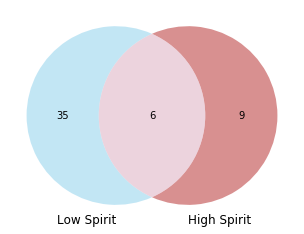

In [30]:
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
%matplotlib inline

venn2_unweighted(subsets = (35, 9, 6), set_labels = ('Low Spirit', 'High Spirit'), set_colors=('skyblue', 'firebrick'), alpha = 0.5);

# Fast or Slow? 

In [31]:
fig = px.box(my_songs, y="tempo")
fig.show()

# World Wide

In [37]:
ww = pd.read_csv(r"C:\Users\Dhruv Kumar Jha\Downloads\Spotify_Analysis\spotifytoptracks2020.csv", encoding= 'unicode_escape')
ww.head()

,Unnamed: 0,track_name,album,artist,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,0,Blinding Lights,After Hours,The Weeknd,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul
1,1,Dance Monkey,Dance Monkey,Tones And I,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie
2,2,The Box,Please Excuse Me For Being Antisocial,Roddy Ricch,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap
3,3,Roses - Imanbek Remix,Roses (Imanbek Remix),SAINt JHN,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic
4,4,Don't Start Now,Future Nostalgia,Dua Lipa,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco


In [38]:
ww.drop(ww.columns[[0,2,4]], axis = 1, inplace = True)
ww.head()

,track_name,artist,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,Blinding Lights,The Weeknd,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul
1,Dance Monkey,Tones And I,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie
2,The Box,Roddy Ricch,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap
3,Roses - Imanbek Remix,SAINt JHN,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic
4,Don't Start Now,Dua Lipa,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco


In [39]:
avg_ww = ww.mean(axis=0)
avg_ww

energy                   0.609300
danceability             0.716720
key                      5.720000
loudness                -6.225900
acousticness             0.256206
speechiness              0.124158
instrumentalness         0.015962
liveness                 0.196552
valence                  0.555710
tempo                  119.690460
duration_ms         199955.360000
dtype: float64

In [46]:
comp = pd.concat([avg_my_songs, avg_ww ], axis=1) # Creating a table for visualising returns and volatility of assets
comp.columns = ['Me', 'Everyone']
comp

,Me,Everyone
duration_ms,209107.220000,199955.360000
danceability,0.632640,0.716720
energy,0.647126,0.609300
key,5.820000,5.720000
loudness,-6.695000,-6.225900
mode,0.600000,NaN
speechiness,0.064810,0.124158
acousticness,0.255770,0.256206
instrumentalness,0.063155,0.015962
liveness,0.150294,0.196552


In [47]:
average_compare = comp.drop(comp.index[11])
average_compare = average_compare.drop(average_compare.index[5])
average_compare = average_compare.drop(average_compare.index[4])
average_compare = average_compare.drop(average_compare.index[3])
average_compare = average_compare.drop(average_compare.index[0])
average_compare

,Me,Everyone
danceability,0.632640,0.716720
energy,0.647126,0.609300
speechiness,0.064810,0.124158
acousticness,0.255770,0.256206
instrumentalness,0.063155,0.015962
liveness,0.150294,0.196552
valence,0.412804,0.555710


In [48]:
avg_comp = pd.DataFrame(average_compare)
avg_comp

,Me,Everyone
danceability,0.632640,0.716720
energy,0.647126,0.609300
speechiness,0.064810,0.124158
acousticness,0.255770,0.256206
instrumentalness,0.063155,0.015962
liveness,0.150294,0.196552
valence,0.412804,0.555710


In [49]:
avg_comp.to_csv('song12.csv', index=True)

In [50]:
average_comp = pd.read_csv(r"C:\Users\Dhruv Kumar Jha\Downloads\Spotify_Analysis\song12.csv", encoding= 'unicode_escape')
average_comp.rename(columns = {"Unnamed: 0":"Feature"}, inplace = True)
average_comp

,Feature,Me,Everyone
0,danceability,0.632640,0.716720
1,energy,0.647126,0.609300
2,speechiness,0.064810,0.124158
3,acousticness,0.255770,0.256206
4,instrumentalness,0.063155,0.015962
5,liveness,0.150294,0.196552
6,valence,0.412804,0.555710


In [51]:
trace1=go.Bar(x=average_comp['Feature'],y=average_comp['Everyone'],marker=dict(color='firebrick',opacity=1),name="Everyone")
trace2=go.Bar(x=average_comp['Feature'],y=average_comp['Me'],marker=dict(color='darksalmon',opacity=1),name="Me")

data=[trace1,trace2]

layout = go.Layout(title="My Music Preferences VS The World's",xaxis=dict(title="Features"),
                   barmode="group")

fig = go.Figure(data,layout)

fig.show()

In [52]:
loudness = pd.DataFrame({"Who":['Everyone', 'Me'],"Loudness":[-6.225900,-6.695000]})
loudness

,Who,Loudness
0,Everyone,-6.2259
1,Me,-6.6950


In [53]:
fig = px.bar(x=loudness['Who'], y=loudness['Loudness'],
              labels={"y": "Loudness Index",
                     "x": " "},
              color_discrete_sequence=px.colors.sequential.RdBu, title="Loudness Preference")

fig.show()

In [54]:
tempo = pd.DataFrame({"Who":['Everyone', 'Me'],"Tempo":[119.690460,119.072580]})
tempo

,Who,Tempo
0,Everyone,119.69046
1,Me,119.07258


In [55]:
fig = px.bar(x=loudness['Who'], y=tempo['Tempo'],
              labels={"y": "Tempo Index",
                     "x": " "},
              color_discrete_sequence=px.colors.sequential.RdBu, title="Tempo Preference")

fig.show()

## Correlation Between Variables

**Correlation** is a statistical term describing the degree to which two variables are co-related with each other. 
If the two variables move in the **same direction**, then those variables are said to have a **positive** correlation. If they move in **opposite directions**, then they have a **negative** correlation.

In [56]:
correlation_df = ww.corr()
correlation_df

,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms
energy,1.000000,0.152552,0.062428,0.791640,-0.682479,0.074267,-0.385515,0.069487,0.393453,0.075191,0.081971
danceability,0.152552,1.000000,0.285036,0.167147,-0.359135,0.226148,-0.017706,-0.006648,0.479953,0.168956,-0.033763
key,0.062428,0.285036,1.000000,-0.009178,-0.113394,-0.094965,0.020802,0.278672,0.120007,0.080475,-0.003345
loudness,0.791640,0.167147,-0.009178,1.000000,-0.498695,-0.021693,-0.553735,-0.069939,0.406772,0.102097,0.064130
acousticness,-0.682479,-0.359135,-0.113394,-0.498695,1.000000,-0.135392,0.352184,-0.128384,-0.243192,-0.241119,-0.010988
speechiness,0.074267,0.226148,-0.094965,-0.021693,-0.135392,1.000000,0.028948,-0.142957,0.053867,0.215504,0.366976
instrumentalness,-0.385515,-0.017706,0.020802,-0.553735,0.352184,0.028948,1.000000,-0.087034,-0.203283,0.018853,0.184709
liveness,0.069487,-0.006648,0.278672,-0.069939,-0.128384,-0.142957,-0.087034,1.000000,-0.033366,0.025457,-0.090188
valence,0.393453,0.479953,0.120007,0.406772,-0.243192,0.053867,-0.203283,-0.033366,1.000000,0.045089,-0.039794
tempo,0.075191,0.168956,0.080475,0.102097,-0.241119,0.215504,0.018853,0.025457,0.045089,1.000000,0.130328
